This Python code is for Murata Electronics thermistor NXFT15WF104FA2B100, available on digikey.com:  
https://www.digikey.com/product-detail/en/murata-electronics/NXFT15WF104FA2B100/490-5633-ND/2533824

In [1]:
import numpy as np

In [31]:
import matplotlib.pyplot as pp
pp.style.use( "seaborn-darkgrid" )

In [9]:
from scipy.optimize import curve_fit

In [4]:
# NumPy array of temperatures from -40 degC to 125 degC
# unit: deg_C
Tref_arr = np.arange( -40, 130, 5 ) 

# list of resistance as a function of temperature
# reference: https://www.murata.com/~/media/webrenewal/support/library/catalog/products/thermistor/ntc/r44e.ashx?la=en-us
# page 31, top table, far-right column
# unit: kilo_ohm
Rref_list = [4397.119,3088.599,2197.225,1581.881,1151.037,846.579,628.988,471.632,357.012,272.500,
             209.710,162.651,127.080,100.000,79.222,63.167,50.677,40.904,33.195,27.091,22.224,
             18.323,15.184,12.635,10.566,8.873,7.481,6.337,5.384,4.594,3.934,3.380,2.916,2.522]
# NumPy array of resistance as a function of temperature
Rref_arr = np.array( Rref_list )

In [19]:
Tref_arr

array([-40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,
        25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,
        90,  95, 100, 105, 110, 115, 120, 125])

In [14]:
Rref_arr

array([4.397119e+03, 3.088599e+03, 2.197225e+03, 1.581881e+03,
       1.151037e+03, 8.465790e+02, 6.289880e+02, 4.716320e+02,
       3.570120e+02, 2.725000e+02, 2.097100e+02, 1.626510e+02,
       1.270800e+02, 1.000000e+02, 7.922200e+01, 6.316700e+01,
       5.067700e+01, 4.090400e+01, 3.319500e+01, 2.709100e+01,
       2.222400e+01, 1.832300e+01, 1.518400e+01, 1.263500e+01,
       1.056600e+01, 8.873000e+00, 7.481000e+00, 6.337000e+00,
       5.384000e+00, 4.594000e+00, 3.934000e+00, 3.380000e+00,
       2.916000e+00, 2.522000e+00])

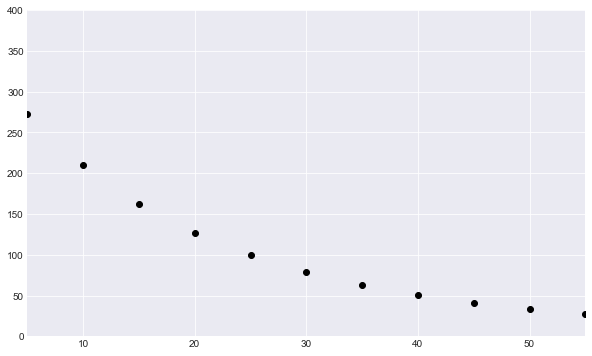

In [36]:
pp.figure( figsize=(10,6) )
pp.plot( Tref_arr, Rref_arr, 'ko' )
pp.xlim( 5, 55 )
pp.ylim( 0, 400 )
pp.show()

In [15]:
def fit_SteinhartHart( T_arr, R_arr, To=298.15 ):
    
    def func(x, beta, Ro):
        return Ro*np.exp( beta*( 1.0/(x+273.15) - 1.0/To ) )
    
    popt, pcov = curve_fit( f=func, xdata=T_arr, ydata=R_arr )
    
    return popt

In [23]:
a, b = 8, 21
#a, b = 10, 19

beta, Ro = fit_SteinhartHart( Tref_arr[a:b], Rref_arr[a:b] )

In [24]:
print beta, Ro

4192.529037435506 99.7283469922503


In [26]:
Tfit_arr = np.arange( 0, 65, 5 ) 
Rfit_arr = Ro*np.exp( beta*( 1.0/(Tfit_arr+273.15) - 1.0/298.15 ) )

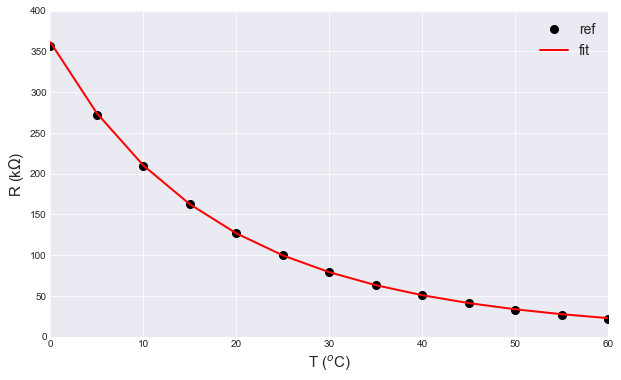

In [46]:
pp.figure( figsize=(10,6) )
pp.plot( Tref_arr, Rref_arr, 'ko', ms=8, label="ref" )
pp.plot( Tfit_arr, Rfit_arr, 'r-', lw=2, label="fit" )
pp.xlim( 0, 60 )
pp.ylim( 0, 400 )
pp.ylabel(r"R (k$\Omega$)", size=15)
pp.xlabel(r"T ($^o$C)", size=15)
pp.legend( loc='best', prop={'size':14} )
pp.show()


In [30]:
10.0/16*10

6.25